In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./Phase 1 Dataset Hackathon.xlsx', sheet_name=None)
data.keys()

odict_keys(['Leather Safety Gloves', 'Ladies Kurta', 'Impact Drill'])

In [3]:
# list all unique measurement units
for key in data:
    print(data[key]['Unit'].unique())

['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces']
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' 1 '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton' 'peice'
 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack' 'Pair'
 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container" 'pack'
 '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One' 'kurtI'
 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)' '12 units' '1pis'
 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)' 'Packet(s)'
 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' 5 'set' 'kurti' 'pcs' 'pices'
 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit' '1 piece'
 '1 pice' 'Suit' 'pair piece' 10 'pieces' '1pcs' '1 pc' '3 set' 'Xl size'
 '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs' 'Feet' 'onepices']
['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit']


In [9]:
# ---------------------------------------------------------
# IDEA- add numeric entries into relevant existing sets and check whether first entry is numeric.
# This will help scale the price by that number for max/min calculation.
# FLAW- '170 per peice', '1000 per unit'
#
# ASSUMPTION- Price listed is per unit, if product is sold in multiple units.
# So now, multiple unit items can be listed in existing lists without needed to affect max,min
# ---------------------------------------------------------

unit_list.add(('pair', ['Pair', 'Pair(s)', 'Pair piece', 'pair piece']))
# ASSUMPTION: Kurti = 1 piece, Onwards = Piece
unit_list.add(('pc', ['Piece', 'Pieces', 'piece', 'Piece(s)', 'Per piece', '1', '1pc', 'peice',
         'one', 'Peice', '1piece', 'No', 'Number', 'Pcs', 'Piece(s) Onwards',
         'One', 'kurtI', 'per piese', '1pis', 'One peace', 'Single', 'one pcs', 'Pc', 
         'pcs', 'pices', 'Pics', 'single piece', 'pi', 'per piece', 'Kurti', '1 piece',
         '1 pice', 'Suit', 'pieces', '1pcs', '1 pc', '1pcd', 'Psc', '1 pcs', 'onepices', 
         '1nos', 'Pc_Onwards', 'onwards', 'Onwards', 'ONWARDS', 'Selfie Kurtis', 'Xl size']))
unit_list.add(('pack', ['pack', 'Pack', 'Packet', 'Bag', 'Packet(s)']))
unit_list.add(('unit', ['Unit', 'Unit/Onwards', 'unit', 'Unit(s)', 'one unit']))
unit_list.add(('set', ['Set', 'Set(S)', 'set', 'Set(s)', 'Sets']))
unit_list.add(('kit', ['kit', 'Kit']))
unit_list.add(('unk', ['40\' Container', '20\' Container']))
unit_list.add(('kg', ['Kilogram']))
unit_list.add(('g', ['Gram']))
unit_list.add(('lb', ['Pound']))
unit_list.add(('oz', ['Ounce(s)', 'Ounce']))
unit_list.add(('m', ['Meter']))
unit_list.add(('inch', ['in']))
unit_list.add(('yard', ['Year']))
unit_list.add(('ft', ['Feet']))
unit_list.add(('unk', ['Unstitch']))
unit_list.add(('Carton', ['Carton']))
unit_list.add(('Barrel', ['Barrel']))
unit_list.add(('$', ['dollar']))
unit_list.add(('Rs.', ['Rs']))
print(unit_list)

miscl = ['170 per peice', '4 pcs', '5', '10', '100 pic', '10-10000', '1000 per unit', '3 set', '12 units', '4 units']

[['Pair', 'Pair(s)', 'Pair piece', 'pair piece'], ['Piece', 'Pieces', 'piece', 'Piece(s)', 'Per piece', 1, '1pc', '170 per peice', 'peice', 'one', 'Peice', '1piece', 'No', 'Number', 'Pcs', 'Piece(s) Onwards', 'One', 'kurtI', 'per piese', '1pis', 'One peace', 'Single', 'one pcs', 'Pc', 'pcs', 'pices', 'Pics', 'single piece', 'pi', 'per piece', 'Kurti', '1 piece', '1 pice', 'Suit', 'pieces', '1pcs', '1 pc', '1pcd', 'Psc', '1 pcs', 'onepices', '1nos', 'Pc_Onwards', 'onwards', 'Onwards', 'ONWARDS', 'Selfie Kurtis', 'Xl size', '100 pic', '10-10000', '4 pcs', 5, 10], ['pack', 'Pack', 'Packet', 'Bag', 'Packet(s)'], ['Unit', 'Unit/Onwards', 'unit', 'Unit(s)', 'one unit', '1000 per unit', '12 units', '4 units'], ['Set', 'Set(S)', 'set', 'Set(s)', 'Sets', '3 set'], ['kit', 'Kit'], ["40' Container", "20' Container"], ['Kilogram', 'Gram', 'Pound', 'Ounce(s)', 'Ounce'], ['Meter', 'Unstitch', 'Feet', 'Year'], ['Carton', 'Barrel'], ['dollar', 'Rs', 'in']]


In [5]:
split_data = {}

for key in data:
    split_data[key] = []
    for unit in unit_list:
        split_data[key].append(data[key][data[key].Unit.isin(unit)])

In [6]:
def price_boxplot(df):
    df.boxplot('Price')

def plot_z_score(df):
    test = (df.Price - df.Price.mean()) / df.Price.std()
    (np.abs(test)).plot.line()

def plot_modified_z_score(df):
    MAD = np.median(np.abs(df.Price - df.Price.median())) # median absolute deviation
    test = 0.6745*(df.Price - df.Price.median()) / df.Price.std()
    (np.abs(test)).plot.line()
    
def remove_outliers(df):     
    # Remove outliers based on modified Z-scores
    if df.empty:
        return df
    MAD = np.median(np.abs(df.Price - df.Price.median()))
    test = 0.6745*(df.Price - df.Price.median()) / df.Price.std()
    return df[(test <= 1.52) & (test >= -1.52)] # experimentally chosen value

In [ ]:
price_boxplot(split_data['Impact Drill'][1])

In [ ]:
plot_z_score(split_data['Impact Drill'][1])

In [7]:
for key in split_data:
    for idx in range(len(split_data[key])):
        split_data[key][idx] = remove_outliers(split_data[key][idx])

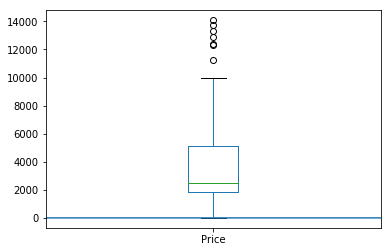

In [18]:
price_boxplot(split_data['Impact Drill'][1])

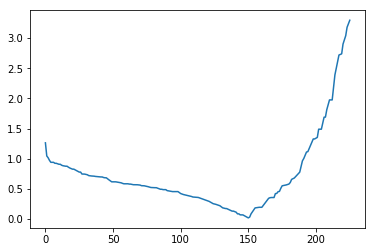

In [19]:
plot_z_score(split_data['Impact Drill'][1])

In [ ]:
# df = split_df[3]
# MAD = np.median(np.abs(df.Price - df.Price.median()))
# test = 0.6745*(df.Price - df.Price.median())/df.Price.std()
# df['Z-score'] = test
# df
# # split_df[3]# = df[(test <= 1.52) & (test >= -1.52)]

In [ ]:
# Univariate Method
# Choose a cleaning parameter (cp)
# Reject all the values which lie outside the range (median - cp, median + cp)

In [ ]:
# Multivariate Method
# Train a model and calculate error for all values
# Choose a acceptable error (ae)
# Reject all the values having error
# in the range (0 - ae, 0 + ae)

In [ ]:
# Problem: Univariate (single feature: price) point (single data pts lying far from dist.) outliers